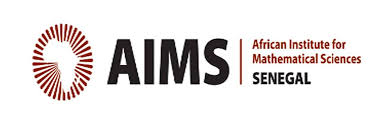

<h1><center> DEEP LEARNING </center><h1>

# CODE: GRP1199JK

<h1 > PROJECT 1: HOUSE PRICES PREDICTION </h1>

### INTRODUCTION

 >*L'objectif de ce travail est la prédiction des prix de maisons. Pour ce faire nous allons appliquer les méthodes d'apprentissage profond (deep learning) afin de construire un modèle capable d'atteindre cet objectif.

### Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Chargement des données

In [3]:
boston_housing = keras.datasets.boston_housing
(train_data,train_labels),(test_data, test_labels) = boston_housing.load_data()

### Description des variables

 Il y a 14 variables dans  l'ensemble de données. Il s'agit de:
 
1)CRIM - taux de criminalité par habitant par ville

2)ZN - proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.

3)INDUS - proportion de terrains commerciaux non commerciaux par ville.

4)CHAS - variable muette Charles River (1 si la parcelle est bordée par la rivière, 0 sinon).

5)NOX - concentration d'oxydes nitriques (parties par 10 millions).

6)RM - nombre moyen de pièces par logement

7)AGE - proportion de logements occupés par leur propriétaire construits avant 1940

8)DIS - distances pondérées à cinq centres d'emploi de Boston

9)RAD - indice d'accessibilité aux autoroutes radiales

10)TAX - taux de l'impôt foncier sur la pleine valeur par 10 000 en dollars.

11)PTRATIO - ratio élèves/professeurs par ville

12)B -  est la proportion de Noirs par ville

13)LSTAT - est le porcentage de statut inférieur de la population

14)MEDV - Valeur médiane des maisons occupées par leur propriétaire, en milliers de dollars.


### Visualisation de l'ensemble des données

In [4]:
colonne = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
train = np.concatenate([train_data,test_data])
dic = {colonne[i]:train[:,i] for i in range(len(colonne))}
df = pd.DataFrame(dic)

In [5]:
df['MEDV'] = np.concatenate([train_labels,test_labels])

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [7]:
df.shape

(506, 14)

### Vérifions s'il y'a des valeurs manquantes

In [8]:
df.isnull().sum().sum()

0

### Observons la variable cible ('MEDV')

In [100]:
df['MEDV']

0      15.2
1      42.3
2      50.0
3      21.1
4      17.7
       ... 
501    21.9
502    24.1
503    50.0
504    26.7
505    25.0
Name: MEDV, Length: 506, dtype: float64

>* Nous constatons que la variable cible prend un ensemble de valeurs continues. Il s'agit d'un problème de regression

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


>* Nous remarquons en faisant une description de notre dataset que certaines variables ont des valeurs élévées par rapport aux autres variables.

### Matrice de corrélation

In [255]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm',axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Répartition de certaines variables

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='TAX', ylabel='RM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='TAX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='INDUS', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='TAX'>,
        <AxesSubplot:xlabel='MEDV', ylabel='TAX'>,
        <AxesSubplot:xlabel='TAX', ylabel='TAX'>,
        <AxesSubplot:xlabel='INDUS', ylabel='TAX'>],
       [<AxesSubplot:xlabel='RM', ylabel='INDUS'>,
        <AxesSubplot:xlabel='MEDV', ylabel='INDUS'>,
        <AxesSubplot:xlabel='TAX', ylabel='INDUS'>,
        <AxesSubplot:xlabel='INDUS', ylabel='INDUS'>]], dtype=object)

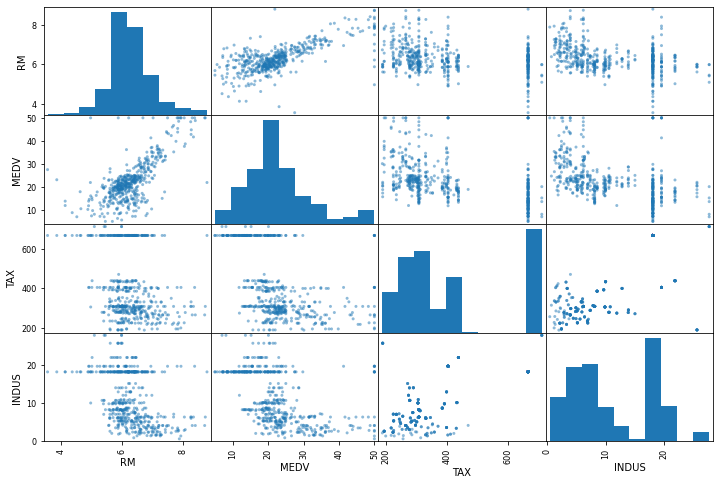

In [102]:
from pandas.plotting import scatter_matrix

attributes = ["RM", "MEDV", "TAX",
              "INDUS"]
scatter_matrix(df[attributes], figsize=(12, 8))

>* Au regard de la répartition des variables décrites ci-dessus, nous remarquons que le nombre de pièces par logement (variable 'RM') a un grand impact sur le prix de la maison (variable 'MEDV').

Comme nous l'avons mentionné plus haut, certaines variables ont des proportions élevées par rapport aux autres et pourront ainsi avoir un impact conséquent. Pour donc palier à cela,nous allons raméner nos différentes variables à la même échelle en utilisant la méthode de standardisation.

### Standardisation des données

>* Nous allons à present centrer et reduire nos données

In [9]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

### Répartion nos données en deux: données d'apprentissage et de test. 

In [10]:
cols = list(scaled_data.columns[0:-1])
X, y = scaled_data[cols], scaled_data['MEDV']


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Créons notre premier modèle à l'aide des réseaux de neurones.

>* Avant de s'y mettre nous allons préciser les différentes métriques mis en exergue pour évaluer le modèle. IL s'agit du 'mean absolute error', 'mean square error'.
>* MAE : C'est la moyenne de la valeur absolue des erreurs. Elle mesure la différence entre deux variables continues, ici les valeurs réelles et prédites de y. 
>* MSE : L'erreur quadratique moyenne (MSE) est identique à la MAE, mais elle élève au carré la différence avant de les additionner au lieu d'utiliser la valeur absolue. 

In [11]:
# Importation des librairies
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

In [12]:
# definition du modèle
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='he_uniform'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae','mse'])

In [203]:
# fit model
history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=10, epochs=100)

Epoch 1/100
37/37 [==============================] - 0s 5ms/step - loss: 4.2082 - mae: 1.4833 - mse: 4.2082 - val_loss: 3.2611 - val_mae: 1.2554 - val_mse: 3.2611
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 3.2496 - mae: 1.2329 - mse: 3.2496 - val_loss: 2.0118 - val_mae: 0.9657 - val_mse: 2.0118
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 2.2300 - mae: 0.9807 - mse: 2.2300 - val_loss: 1.4674 - val_mae: 0.8124 - val_mse: 1.4674
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 1.3573 - mae: 0.7637 - mse: 1.3573 - val_loss: 1.1442 - val_mae: 0.7258 - val_mse: 1.1442
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.9575 - mae: 0.6503 - mse: 0.9575 - val_loss: 0.9445 - val_mae: 0.6714 - val_mse: 0.9445
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.9832 - mae: 0.6444 - mse: 0.9832 - val_loss: 0.8040 - val_mae: 0.6305 - val_mse: 0.8040
Epoch 7/100
37/37 [===

37/37 [==============================] - 0s 2ms/step - loss: 0.1674 - mae: 0.2546 - mse: 0.1674 - val_loss: 0.1256 - val_mae: 0.2796 - val_mse: 0.1256
Epoch 52/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1564 - mae: 0.2701 - mse: 0.1564 - val_loss: 0.1261 - val_mae: 0.2818 - val_mse: 0.1261
Epoch 53/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1272 - mae: 0.2484 - mse: 0.1272 - val_loss: 0.1252 - val_mae: 0.2806 - val_mse: 0.1252
Epoch 54/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1716 - mae: 0.2610 - mse: 0.1716 - val_loss: 0.1258 - val_mae: 0.2829 - val_mse: 0.1258
Epoch 55/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1271 - mae: 0.2418 - mse: 0.1271 - val_loss: 0.1240 - val_mae: 0.2811 - val_mse: 0.1240
Epoch 56/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1663 - mae: 0.2744 - mse: 0.1663 - val_loss: 0.1209 - val_mae: 0.2771 - val_mse: 0.1209
Epoch 57/100
37/37 [=========

In [248]:
# Evaluation du modele

results= model.evaluate(X_test, Y_test )
for i in range(len(model.metrics_names)):
      print(model.metrics_names[i]," : ", results[i])

4/4 [==============================] - 0s 2ms/step - loss: 0.1392 - mae: 0.2762 - mse: 0.1392
loss  :  0.13917776942253113
mae  :  0.2761610746383667
mse  :  0.13917776942253113


### Visualisation de la fonction cout pour les donnees d'apprentissage et de validation

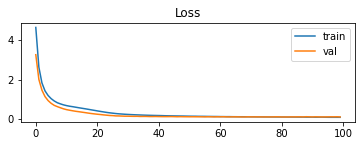

In [212]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()

### Visualisation des différences entre les prix réels et les valeurs prédites

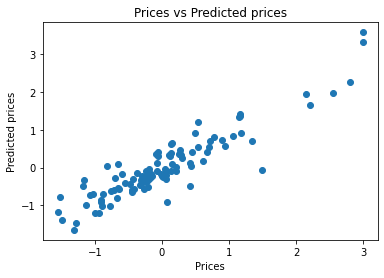

In [259]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

>* Nous remarquons que entre la valeur prédite par le modèle et la valeur réelle il y'a une forte correlation et nous avons obtenu une erreur d'environ 13%.
>* Cependant, aucours de nos investigations nous avons constaté une instabilité au niveau du modèle, car à chaque simulation nous obtenons une variation de l'erreur. Ceci pourrait être due à la taille de notre dataset (506 lignes et 14 colonnes).

>* Dans le but de resoudre ce probleme et de guarantie une plus grande fiabilité du modèle, nous étudierons par la suite certains modèles de machine Learnig a savoir: Regression lineaire et 'Random Forest'.

## Autre approche

>* En plus des deux métriques mentionnées ci dessus, nous allons utiliser la métrique 'coéfficient de détermination' nomée $R^2$.

### Regression lineaire

In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, Y_train)

LinearRegression()

In [225]:
# Model prediction on train data
y_pred = lm.predict(X_test)

In [226]:
#Evaluation du modele
print('R^2:',metrics.r2_score(Y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_pred))

R^2: 0.722254912738295
MAE: 0.37735483054495095
MSE: 0.2380604117751705


### Visualisation des différences entre les prix réels et les valeurs prédites

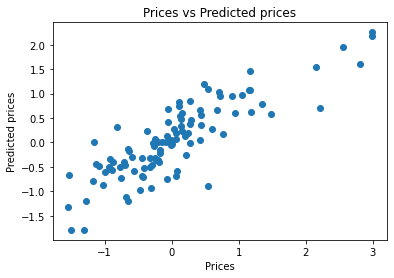

In [256]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

>* Avec le modèle de regression lineaire, le score $R^2$ est de 72% pour les données de test avec un 'mse' de 23%. Ce score est peu appreciable car l'erreur est grande et par conséquent le modèle a du mal à faire de bonnes prédictions.

### Random forest

In [227]:
# Create a Random Forest Regressor
RF = RandomForestRegressor(n_estimators= 30 , max_features= 8 ,max_depth=13, random_state=0)

# Train the model using the training sets 
RF.fit(X_train, Y_train)

RandomForestRegressor(max_depth=13, max_features=8, n_estimators=30,
                      random_state=0)

In [228]:
y_test_pred = RF.predict(X_test)

In [229]:
acc_rf = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_rf)
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))

R^2: 0.8733244849621566
MAE: 0.2387081581301219
MSE: 0.10857590882724034


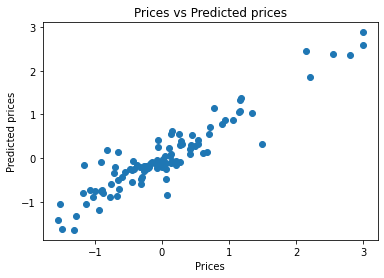

In [257]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

>* Avec le 'Random Forest', le score pour les données de test est d'environ 87% avec un 'mse' de 10.8%, ce qui est élévé par rapport au score obtenu avec le modèle de regression lineaire.

## Recapitulatif des modèles

In [252]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest','Reseaux de neurones'],
    'mse(%)': [metrics.mean_squared_error(Y_test, y_pred)*100, metrics.mean_squared_error(Y_test, y_test_pred)*100, results[2]*100]})
models.sort_values(by='mse(%)', ascending=True)


,Model,mse(%)
1,Random Forest,10.857591
2,Reseaux de neurones,13.917777
0,Linear Regression,23.806041


### CONCLUSION

>* En somme, nous avons eu pour objectif principale de construire un modèle capable de prédire les prix de maisons. Il en ressort au regard de notre travail que le modèle le plus précis que nous avons obtenu est celui utilisant le 'Random Forest'.Car son erreur ('mse') est la plus faible et il nous a donné un score d'environ 87%.